In [1]:
!pip install -r ../requirements.txt

In [2]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, K):
        self.K = K
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1 - x2) ** 2))
        return distance

    def predict(self, X):
        predictions = []
        for i, x_test in enumerate(X):
            distances = np.array([self._compute_distance(x_test, x_train) for x_train in self.X_train])
            neighbor_indices = np.argsort(distances)[:self.K]
            neighbor_labels = self.y_train[neighbor_indices]
            most_common = Counter(neighbor_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
K = 5
knn = KNNClassifier(K=K)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"KNN Classification Accuracy: {accuracy * 100:.2f}%")


KNN Classification Accuracy: 96.00%


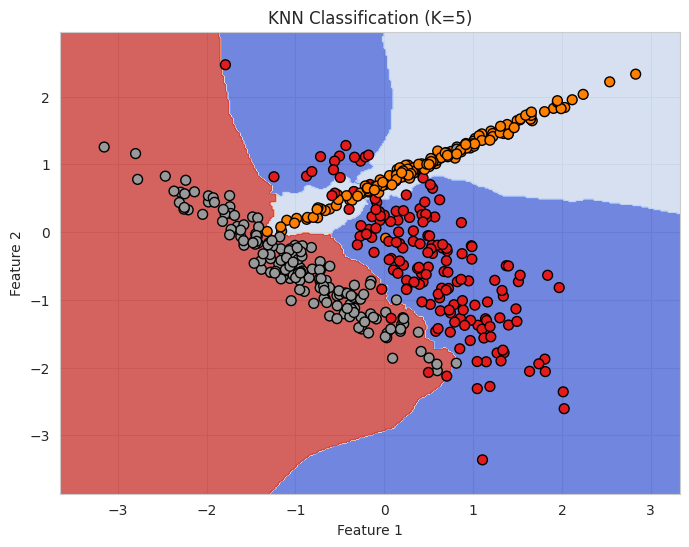

In [5]:
from matplotlib import pyplot as plt


def plot_decision_boundaries(X, y, model, K):
    h = .02
    cmap_light = plt.cm.coolwarm
    cmap_bold = ['darkorange', 'c', 'darkblue']

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=50)
    plt.title(f'KNN Classification (K={K})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_boundaries(X_combined, y_combined, knn, K)


In [6]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.91      1.00      0.95        40
           2       1.00      0.97      0.98        29

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

